In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

# load and review data

In [2]:
df= pd.read_csv('E:/Python Projects/shohreh/Shohreh_GitHub_Repository/Data-Analysis-And-Machine-Learning-Projects/5. SkLearn Datasets/Sklearn_CaliforniaHousingDataset/housing.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [3]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
df['ocean_proximity']= le.fit_transform(df['ocean_proximity'])
le.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000
ocean_proximity,20640.0,1.165843,1.420662,0.0000,0.0000,1.0000,1.00000,4.0000


# visualization

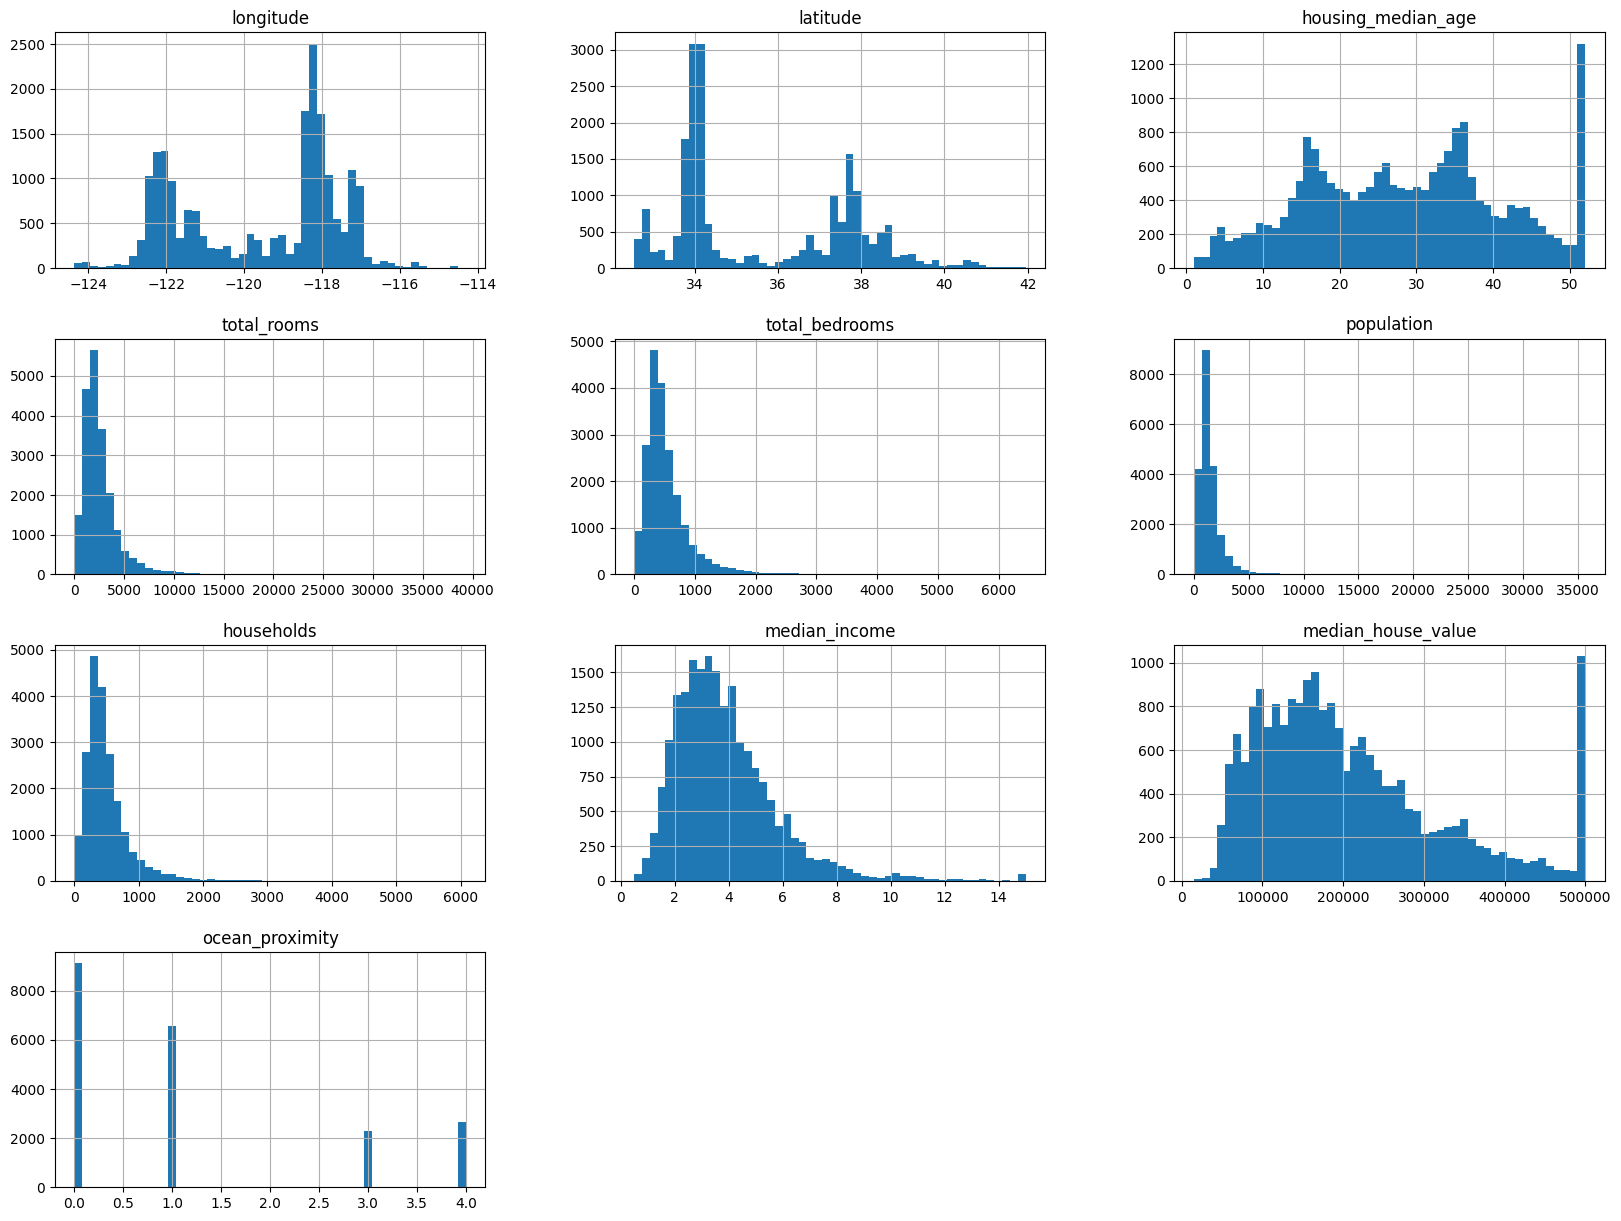

In [6]:
df.hist(bins=50, figsize= (20,15))
plt.show()

IndexError: index 9 is out of bounds for axis 0 with size 9

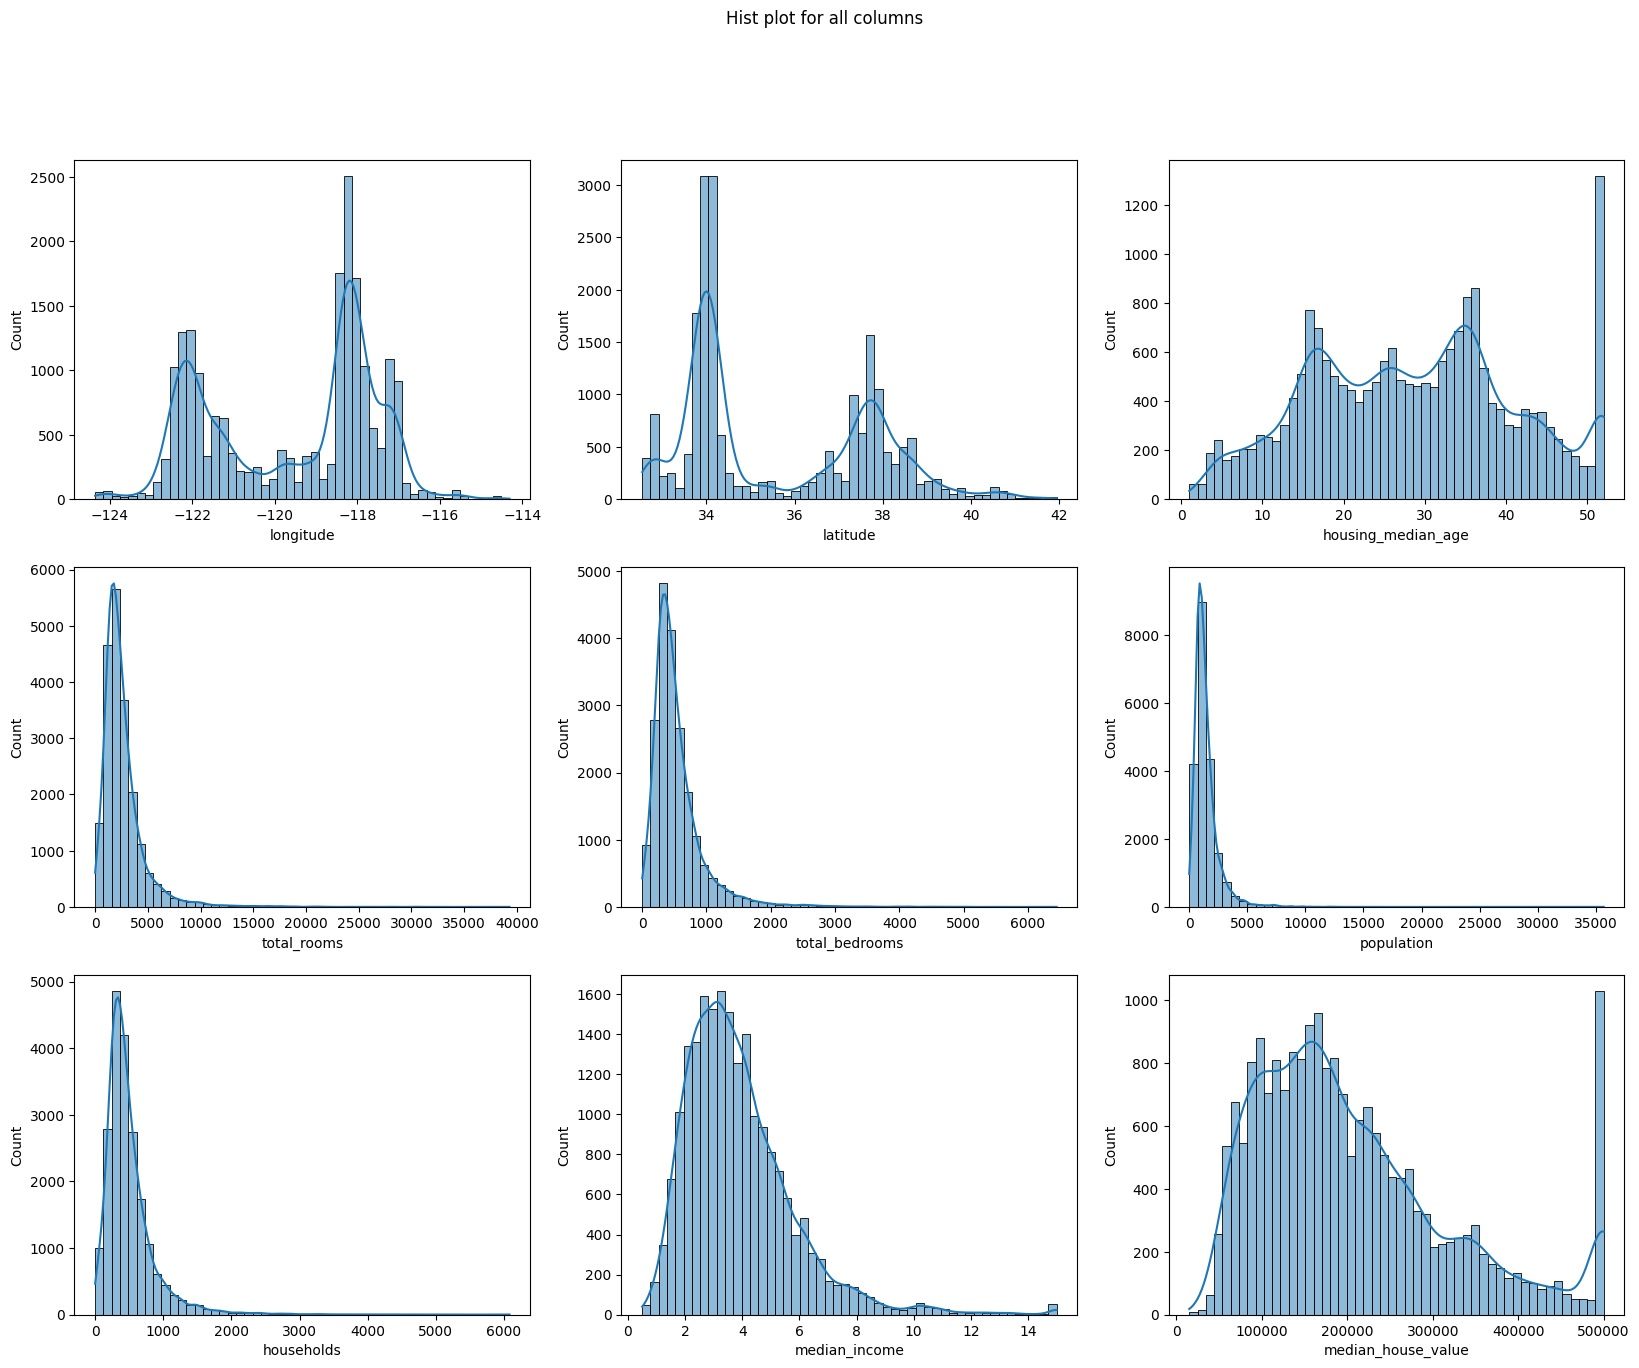

In [20]:
numeric_columns= df.select_dtypes(include=['number']).columns
numeric_columns
ncols=3
nrows= round(len(numeric_columns) / ncols)
fig, axes=plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,15))
fig.suptitle('Hist plot for all columns')
axes= axes.flatten()
for i , col in enumerate(numeric_columns):
    sns.histplot(df[col], bins=50, edgecolor='black', kde= True, ax= axes[i])

plt.tight_layout()
plt.show()

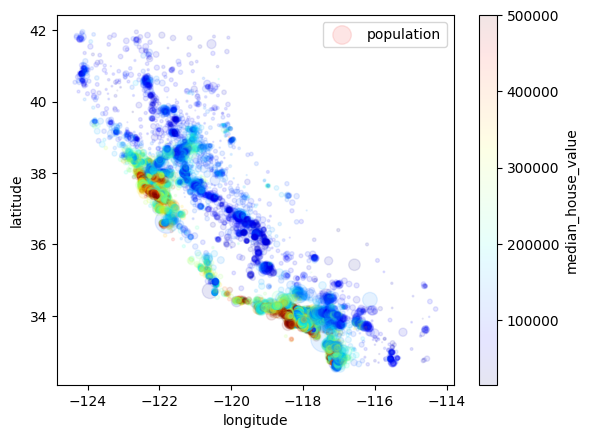

In [8]:
df.plot(kind= 'scatter', x='longitude' ,y='latitude', alpha=0.1, s=df["population"]/100, label="population", c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

# Correlations

In [9]:
corr_matrix= df.corr()
corr_matrix['median_house_value'].sort_values()

latitude             -0.144160
longitude            -0.045967
population           -0.024650
total_bedrooms        0.049686
households            0.065843
ocean_proximity       0.081750
housing_median_age    0.105623
total_rooms           0.134153
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='housing_median_age', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housing_median_age'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='housing_media

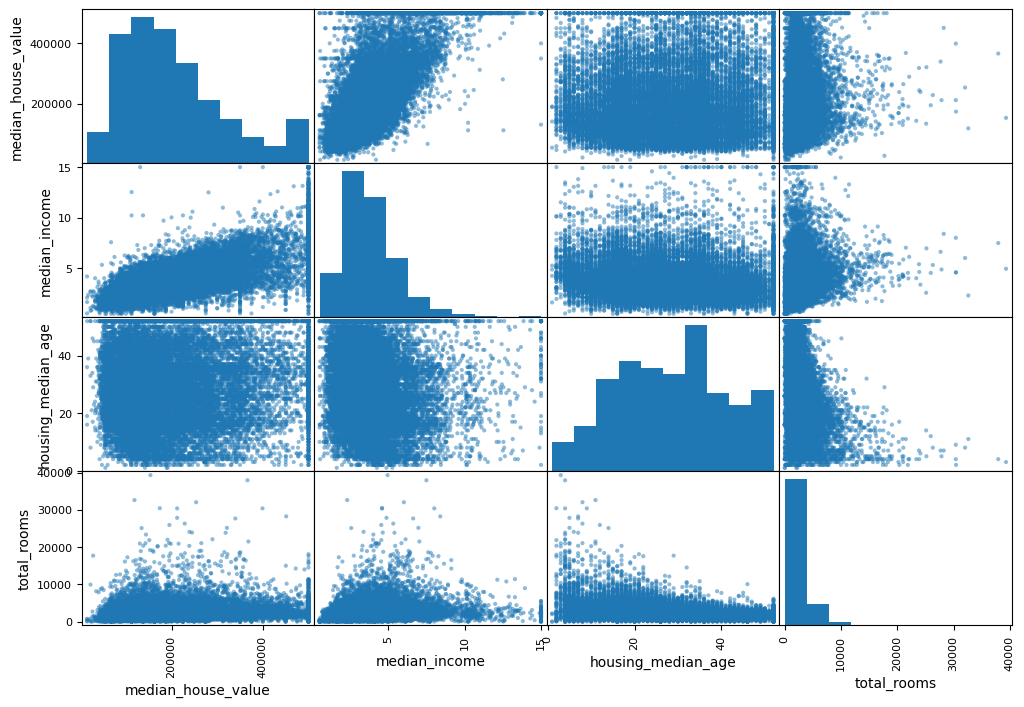

In [10]:
# from Pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix
column=['median_house_value', 'median_income', 'housing_median_age', 'total_rooms']
scatter_matrix(df[column], figsize=(12,8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

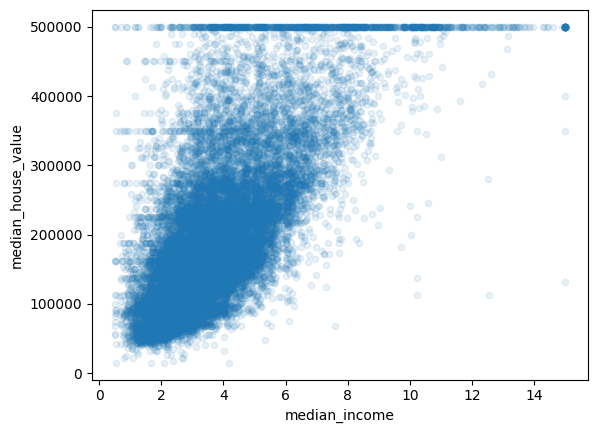

In [11]:
df.plot(kind= 'scatter', y='median_house_value', x='median_income', alpha=0.1)

In [12]:
df['bedrooms_per_rooms']= df['total_bedrooms'] / df['total_rooms']
df['population_per_households']= df['population'] / df['households']
df['rooms_per_households']= df['total_rooms'] / df['households']
corr_matrix= df.corr()
corr_matrix['median_house_value'].sort_values()

bedrooms_per_rooms          -0.255880
latitude                    -0.144160
longitude                   -0.045967
population                  -0.024650
population_per_households   -0.023737
total_bedrooms               0.049686
households                   0.065843
ocean_proximity              0.081750
housing_median_age           0.105623
total_rooms                  0.134153
rooms_per_households         0.151948
median_income                0.688075
median_house_value           1.000000
Name: median_house_value, dtype: float64

In [4]:
# fill missing value for total_bedrooms

#df['total_bedrooms']= df['total_bedrooms'].fillna(df['total_bedrooms'].median())

df['total_bedrooms'] = df.groupby('total_rooms')['total_bedrooms'].transform(lambda x: x.fillna(x.median()))
df['total_bedrooms'] = df.groupby('median_house_value')['total_bedrooms'].transform(lambda x: x.fillna(x.median()))
df['total_bedrooms'] = df.groupby('ocean_proximity')['total_bedrooms'].transform(lambda x: x.fillna(x.median()))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int32  
dtypes: float64(9), int32(1)
memory usage: 1.5 MB


In [49]:
# fill missing value use Sklearn.impute
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy= 'median')
df['total_bedrooms'] = imputer.fit_transform(df[['total_bedrooms']])
df.info()

## fill missing value use Sklearn.impute for all dataset
#df=imputer.fit(df)

# Transformation Pipelines

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer


num_columns= df.select_dtypes(include=['number']).columns.tolist()
cat_columns= ['ocean_proximity']

pipeline_num= Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
     ('std_scal',StandardScaler())
])
pipeline_cat= Pipeline([
     ('label_Encoder',OrdinalEncoder())
])
pipeline_full= ColumnTransformer([
    ('cat_pip', pipeline_cat, cat_columns),
    ('num_pip', pipeline_num, num_columns)
])

df_transform= pipeline_full.fit_transform(df)
df=pd.DataFrame(df_transform, columns= num_columns + cat_columns)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity
0,3.0,-1.327835,1.052548,0.982143,-0.804819,-0.971255,-0.974429,-0.977033,2.344766,2.129631,1.291089
1,3.0,-1.322844,1.043185,-0.607019,2.045890,1.354229,0.861439,1.669961,2.332238,1.314156,1.291089
2,3.0,-1.332827,1.038503,1.856182,-0.535746,-0.826061,-0.820777,-0.843637,1.782699,1.258693,1.291089
3,3.0,-1.337818,1.038503,1.856182,-0.624215,-0.718951,-0.766028,-0.733781,0.932968,1.165100,1.291089
4,3.0,-1.337818,1.038503,1.856182,-0.462404,-0.611841,-0.759847,-0.629157,-0.012881,1.172900,1.291089


# split data

In [6]:
X= df.drop(columns=['median_house_value'], axis=1)
y= df['median_house_value']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=.8, random_state=42)

# LinearRegression

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


model= LinearRegression()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
model.score(X_test, y_test)
print(f'MSE= {mean_squared_error(y_test, y_pred):.4f}\nR2= {r2_score(y_test, y_pred):.4f}')
np.sqrt(mean_squared_error(y_test, y_pred))

MSE= 0.3890
R2= 0.6033


0.6236772936408211

# DecisionTree

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

model=DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
model.score(X_test, y_test)
print(f'MSE= {mean_squared_error(y_test, y_pred):.4f}\nR2= {r2_score(y_test, y_pred):.4f}')
np.sqrt(mean_squared_error(y_test, y_pred))


MSE= 0.4687
R2= 0.5220


0.6846412146918959

# Random Forest

In [11]:
from sklearn.ensemble import RandomForestRegressor

model= RandomForestRegressor()
model.fit(X_train, y_train)
p_pred= model.predict(X_test)
model.score(X_test, y_test)
print(f'MSE= {mean_squared_error(y_test, y_pred):.4f}\nR2= {r2_score(y_test, y_pred):.4f}')
np.sqrt(mean_squared_error(y_test, y_pred))

MSE= 0.4687
R2= 0.5220


0.6846412146918959

# Support Vector Machine regressor

In [8]:
from sklearn.svm import SVR
#from sklearn.metrics import mean_squared_error, r2_score

model= SVR()#(kernel='linear', C=100, gamma=0.1, epsilon=0.1)
model.fit(X_train, y_train)
p_pred= model.predict(X_test)
model.score(X_test, y_test)

0.7515564724111302

# Cross Validation

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression


estimators= {
    'LinearRegression' : LinearRegression(),
    'DecisionTreeRegressor' : DecisionTreeRegressor(),
    'RandomForestRegressor' : RandomForestRegressor(),
    'SVR' : SVR()
}
for estimator_name, estimator_object in estimators.items():
    scores= cross_val_score(estimator=estimator_object, X=X, y=y, cv=2, scoring="r2")
    #print(f'{estimator_name:>20} :  Mean accuracy= {scores.mean():.4f}\n\t\t\tStandar deviation= {scores.std():.4f}')
    print(f'{estimator_name:>20} : Mean R² = {scores.mean():.4f}\n\t\t\tStandard deviation = {scores.std():.4f}')
    

    LinearRegression : Mean R² = 0.6456
			Standard deviation = 0.0007
DecisionTreeRegressor : Mean R² = 0.3060
			Standard deviation = 0.0860
RandomForestRegressor : Mean R² = 0.6310
			Standard deviation = 0.0284
                 SVR : Mean R² = 0.7206
			Standard deviation = 0.0015


In [ ]:
from sklearn.externals import joblib

joblib.dump(my_model, "my_model.pkl")
# and later...
my_model_loaded = joblib.load("my_model.pkl")

# Fine Tune - Grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

params=[{'n_estimators' : [3,10,30], 'max_features' : [2,4,6,8]},
       {'bootstrap' : [False], 'n_estimators' : [3,10], 'max_features' : [2,4,6]}]
model= RandomForestRegressor()
gridSearch= GridSearchCV(model, params, cv=10, scoring= 'r2')
gridSearch.fit(X, y)
print(gridSearch.best_params_)
print(gridSearch.best_score_)
print(gridSearch.best_estimator_)
print(randomSearch.best_estimator_.feature_importances_)

# Fine Tune - Random search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

params=[{'n_estimators' : [3,10,30], 'max_features' : [2,4,6,8]},
       {'bootstrap' : [False], 'n_estimators' : [3,10], 'max_features' : [2,4,6]}]
model= RandomForestRegressor()
randomSearch= RandomizedSearchCV(model, params, cv=2, scoring= 'r2')
randomSearch.fit(X, y)
print(randomSearch.best_params_)
print(randomSearch.best_score_)
print(randomSearch.best_estimator_)
print(randomSearch.best_estimator_.feature_importances_)

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

params= {
    'kernel' : ['linear', 'rbf'],
    'C' : [1, 3, 10, 30, 100, 300],
    'gamma' : [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
    'epsilon' : [0.1, 0.2]
}

model= SVR()
randomSearch= RandomizedSearchCV(model, params, cv=2, scoring= 'r2')
randomSearch.fit(X, y)
print(randomSearch.best_params_)
print(randomSearch.best_score_)
print(randomSearch.best_estimator_)